In [1]:

import time
import pandas as pd
import glob
import numpy as np
import timeit
import pickle

from multiprocessing import Pool
from matplotlib import pyplot as plt
def toc(start_time):
    elapsed = timeit.default_timer() - start_time
    print(elapsed)
start_time = timeit.default_timer()

# import matplotlib.pyplot as plt

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
%config InlineBackend.figure_format = 'svg'
plt.rcParams.update({'font.size': 8, 'font.style': 'normal', 'font.family':'serif'})
#matplotlib.rcParams.update({'font.size': 18})

path_dicts='/mnt/sdb1/sandeep/dicts_chess/'

In [2]:
YEAR_OF_PGN=2015
MONTH_OF_PGN=1
if MONTH_OF_PGN<10: MONTH_OF_PGN='0'+str(MONTH_OF_PGN)
    
t_ic=time.time()
file_to_read = open(path_dicts+"dict_lichess_db_standard_rated_"+str(YEAR_OF_PGN)+"-"+str(MONTH_OF_PGN)+".pkl", "rb")
dict_career_MAIN = pickle.load(file_to_read)


t_oc=time.time()
print(t_oc-t_ic)
                    


8.451540470123291


In [3]:
t_ic=time.time()

for MONTH_OF_PGN in range(2,13):
    if MONTH_OF_PGN<10: MONTH_OF_PGN='0'+str(MONTH_OF_PGN)

    file_to_read = open(path_dicts+"dict_lichess_db_standard_rated_"+str(YEAR_OF_PGN)+"-"+str(MONTH_OF_PGN)+".pkl", "rb")
    dict_career= pickle.load(file_to_read)


    it_career=0
    LL=len(dict_career.keys())
    for key_ in dict_career.keys():
        it_career=it_career+1
        career_=dict_career[key_]

        if key_ in dict_career_MAIN.keys():
            dict_career_MAIN[key_]=dict_career_MAIN[key_]+career_
        else:
            dict_career_MAIN.setdefault(key_, []).append(career_)

        if it_career % 5000 == 0:
            t_oc = time.time();
            print('MONTH=',MONTH_OF_PGN,'-----',it_career/LL)
            with open("/mnt/sdb1/sandeep/0. Careers in chess/b_PROG_MERGING_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
                file_object.write('Y='+str(YEAR_OF_PGN)+'-MONTH='+str(MONTH_OF_PGN)+'--'+str(it_career/LL)+'--i.e.-'+str(it_career)+'/'+str(LL)+'----time (s)-'+str(round(t_oc-t_ic,2))+'\n')

# print(t_oc-t_ic)
#----------------------------------------------------
# Writing dictionary to file 
#----------------------------------------------------       
with open("/mnt/sdb1/sandeep/0. Careers in chess/b_PROG_MERGING_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
    file_object.write('writing dict to file ------------\n')

file_write=path_dicts+"dict_merged_"+str(YEAR_OF_PGN)+".pkl"
with open(file_write, 'wb') as f:
    pickle.dump(dict_career_MAIN, f, pickle.HIGHEST_PROTOCOL)
with open("/mnt/sdb1/sandeep/0. Careers in chess/b_PROG_MERGING_"+str(YEAR_OF_PGN)+".txt", "a") as file_object:
    file_object.write('done writing dict to file ------------\n')

t_oc=time.time();
print(t_oc-t_ic,' seconds')

MONTH= 02 ----- 0.12011434886011484
MONTH= 02 ----- 0.24022869772022967
MONTH= 02 ----- 0.3603430465803445
MONTH= 02 ----- 0.48045739544045934
MONTH= 02 ----- 0.6005717443005741
MONTH= 02 ----- 0.720686093160689
MONTH= 02 ----- 0.8408004420208038
MONTH= 02 ----- 0.9609147908809187
MONTH= 03 ----- 0.10493840115851995
MONTH= 03 ----- 0.2098768023170399
MONTH= 03 ----- 0.31481520347555986
MONTH= 03 ----- 0.4197536046340798
MONTH= 03 ----- 0.5246920057925998
MONTH= 03 ----- 0.6296304069511197
MONTH= 03 ----- 0.7345688081096396
MONTH= 03 ----- 0.8395072092681596
MONTH= 03 ----- 0.9444456104266795
MONTH= 04 ----- 0.10300146262076922
MONTH= 04 ----- 0.20600292524153843
MONTH= 04 ----- 0.30900438786230766
MONTH= 04 ----- 0.41200585048307686
MONTH= 04 ----- 0.5150073131038461
MONTH= 04 ----- 0.6180087757246153
MONTH= 04 ----- 0.7210102383453845
MONTH= 04 ----- 0.8240117009661537
MONTH= 04 ----- 0.927013163586923
MONTH= 05 ----- 0.09376113413467849
MONTH= 05 ----- 0.18752226826935697
MONTH= 05 -

In [20]:
len(dict_career_MAIN.keys())

286289

In [21]:
len(dict_career.keys())

79968

In [75]:
# how_many_=0
# for key_ in dict_career.keys():
#     how_many_=how_many_+int(key_ in dict_career_MAIN.keys())
# how_many_

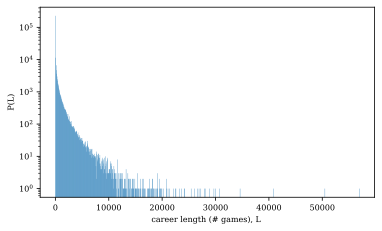

In [19]:

career_len=[]
cc=0
for key_ in dict_career_MAIN:
    career_len.append(len((dict_career_MAIN[key_])))
#     cc=cc+1; 
#     if cc>10: break;

fig = plt.figure(0,figsize=(6, 3.5));
ax = fig.add_subplot(1, 1, 1);
ax.hist(career_len,1000);

# ax.legend(store_lines,leg_,loc=(1.04,0));
ax.set(xlabel="career length (# games), L ", ylabel='P(L)');
ax.set_yscale('log',base=10)

# ax.set_xticks(xtick_s)
# ax.set_xlim(1,100);